<a href="https://colab.research.google.com/github/pronsSec/Translator-for-Content-Creators/blob/main/Content_CreatorTranslator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ---
_   _   _   _   _   _   _     _   _     _   _   _   _   _   _   _     _   _   
 ( A | u | d | i | o ) ( T | r | a | n | s | l | a | t | o | r ) ( f | o | r )
 
( C | o | n | t | e | n | t ) ( C | r | e | a | t | o | r | s )
 

---


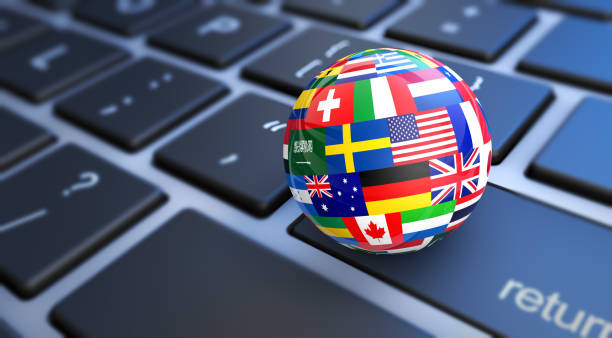

---
---
---
# Russian > English for now ...  Additional language support to be added ASAP
---
# 60 seconds max for now ... press play and only proceed after the previous cell has finished running



--------------------------------------------------------------------------------

Download this safe audio sample in Russian language here if needed...local upload of .wav only at this point (changing soon to live input + others) 

https://nemo-public.s3.us-east-2.amazonaws.com/mcv-samples-ru/common_voice_ru_19034087.wav

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
---
---
-----------------------------------------------------------------------
⬇
---
---
---

In [5]:
#@title Press play. 
#@markdown It will take some time to initiate everything as it is being processed fresh each time. 
import sys
import os
import re
import requests

from textblob import TextBlob

import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from datetime import datetime, timedelta
from IPython.display import clear_output
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_theme(style="darkgrid")


from os import path

import nemo
import nemo.collections.asr as nemo_asr
import nemo.collections.nlp as nemo_nlp
import nemo.collections.tts as nemo_tts
# We'll use this to listen to audio
import IPython
# install Flair
!pip install --upgrade git+https://github.com/flairNLP/flair.git

clear_output()
# import Flair stuff
from flair.data import Sentence
from flair.models import SequenceTagger

tagger = SequenceTagger.load('ner')

clear_output()

#import Flair Classifier
from flair.models import TextClassifier

classifier = TextClassifier.load('en-sentiment')

clear_output()


BRANCH = 'v1.0.0'
!python -m pip install git+https://github.com/NVIDIA/NeMo.git@$BRANCH#egg=nemo_toolkit[all]
clear_output()


# Speech Recognition model - QuartzNet trained on Russian part of MCV 6.0
quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_ru_quartznet15x5").cuda()
# Neural Machine Translation model
nmt_model = nemo_nlp.models.MTEncDecModel.from_pretrained(model_name='nmt_ru_en_transformer6x6').cuda()
# Spectrogram generator which takes text as an input and produces spectrogram
spectrogram_generator = nemo_tts.models.Tacotron2Model.from_pretrained(model_name="tts_en_tacotron2").cuda()
# Vocoder model which takes spectrogram and produces actual audio
vocoder = nemo_tts.models.WaveGlowModel.from_pretrained(model_name="tts_waveglow_88m").cuda()
clear_output()
print('Done')

In [7]:
#@title This will ask for your local file input of a .wav file...IMPORTANT: The audio must be mono with 16Khz sampling rate  { display-mode: "form" }


from google.colab import files
clear_output()
uploaded = files.upload()
clear_output()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
IPython.display.Audio(fn)




User uploaded file "common_voice_ru_19034087.wav" with length 205100 bytes


In [8]:
#@title Press here to see your text outputs as well as your audio output. { display-mode: "form" }

russian_text = quartznet.transcribe([fn])
english_text = nmt_model.translate(russian_text)



# A helper function which combines Tacotron2 and WaveGlow to go directly from 
# text to audio
def text_to_audio(text):
  parsed = spectrogram_generator.parse(text)
  spectrogram = spectrogram_generator.generate_spectrogram(tokens=parsed)
  audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)
  return audio.to('cpu').numpy()

clear_output()



#print output
print('--------------------------------------------')
print('--------------------------------------------')
print('TEXT OUTPUT: ')
print('--------------------------------------------')
print('Input Language: ' + str(russian_text))

print('English form: ' + str(english_text))

# Listen to generated audio in English
print('--------------------------------------------')
print('--------------------------------------------')
print('Press to hear your output: ')
IPython.display.Audio(text_to_audio(english_text[0]), rate=22050)

--------------------------------------------
--------------------------------------------
TEXT OUTPUT: 
--------------------------------------------
Input Language: ['я предлагаю пока оставить этот пункт до его прояснения']
English form: ['I suggest that this paragraph be left pending until it is clarified']
--------------------------------------------
--------------------------------------------
Press to hear your output: 
